In [1]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Suppress the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None) # Displaying all the columns
pd.set_option('display.max_rows', 150) # Displaying maximum 150 rows

# Loading all the necessary data

In [4]:
df_application_current = pd.read_csv('application_data.csv')
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
print(df_application_current.columns)
print(df_application_current.shape)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
(307511, 122)


In [6]:
df_application_current.dtypes.sort_index()  # Getting the information about the data types

AMT_ANNUITY                     float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
AMT_INCOME_TOTAL                float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_YEAR      float64
APARTMENTS_AVG                  float64
APARTMENTS_MEDI                 float64
APARTMENTS_MODE                 float64
BASEMENTAREA_AVG                float64
BASEMENTAREA_MEDI               float64
BASEMENTAREA_MODE               float64
CNT_CHILDREN                      int64
CNT_FAM_MEMBERS                 float64
CODE_GENDER                      object
COMMONAREA_AVG                  float64
COMMONAREA_MEDI                 float64
COMMONAREA_MODE                 float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_ID_PUBLISH                   int64


In [7]:
df_application_previous = pd.read_csv('previous_application.csv')
df_application_previous.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df_application_previous.columns)
print(df_application_previous.shape)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
(1670214, 37)


In [9]:
df_col_desc = pd.read_csv('columns_description.csv', encoding='ISO-8859-1')  # This provides information about the columns
df_col_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [10]:
df_col_desc.shape

(160, 5)

# Handling Missing Values

In [11]:
df_application_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
df_application_current.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [13]:
df_application_current.isnull().sum().sort_values(ascending=False) # Counting the missing values in each column

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [14]:
# Finding the percentage of missing values
empty_df_per = ((df_application_current.isnull().sum()/df_application_current.shape[0])*100).sort_values(ascending=False)  
print(empty_df_per)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [15]:
cols_with_30_percent_missing_values = empty_df_per[empty_df_per.values>=30].index
print(cols_with_30_percent_missing_values)
print(len(cols_with_30_percent_missing_values)) # There are 50 rows with more than 30% missing values

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [16]:
df_application_current.drop(cols_with_30_percent_missing_values, axis=1, inplace=True) # Dropping columns with more than 30% missing values

In [17]:
df_application_current.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [18]:
# Deleting the columns which are irrelavant for the analysis
unwanted=['DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'WEEKDAY_APPR_PROCESS_START']
df_application_current.drop(labels=unwanted,axis=1,inplace=True)

In [19]:
print(df_application_current.shape)
print(df_application_current.columns)

(307511, 53)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    

In [20]:
# Percentage of missing values in each column
missing_percentage  = (df_application_current.isnull().sum()/df_application_current.shape[0]*100).sort_values(ascending=False)
dtypes = df_application_current.dtypes
missing_and_dtypes = pd.DataFrame({
    'Missing Percentage': missing_percentage,
    'Data Type': dtypes
})
missing_and_dtypes = missing_and_dtypes.sort_values(by=['Missing Percentage'], ascending=False)
print(missing_and_dtypes)


                             Missing Percentage Data Type
EXT_SOURCE_3                          19.825307   float64
AMT_REQ_CREDIT_BUREAU_DAY             13.501631   float64
AMT_REQ_CREDIT_BUREAU_HOUR            13.501631   float64
AMT_REQ_CREDIT_BUREAU_MON             13.501631   float64
AMT_REQ_CREDIT_BUREAU_QRT             13.501631   float64
AMT_REQ_CREDIT_BUREAU_WEEK            13.501631   float64
AMT_REQ_CREDIT_BUREAU_YEAR            13.501631   float64
EXT_SOURCE_2                           0.214626   float64
AMT_GOODS_PRICE                        0.090403   float64
AMT_ANNUITY                            0.003902   float64
CNT_FAM_MEMBERS                        0.000650   float64
FLAG_OWN_CAR                           0.000000    object
NAME_CONTRACT_TYPE                     0.000000    object
FLAG_OWN_REALTY                        0.000000    object
FLAG_DOCUMENT_7                        0.000000     int64
FLAG_DOCUMENT_9                        0.000000     int64
FLAG_DOCUMENT_

We can observe that eleven indexes are there which are having null values and also there dtype is float

In [21]:
missing_and_dtypes.head(11).index  # All the columns with missing values

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [22]:
# Lets try reducing the missing values in EXT_SOURCE_3
df_application_current["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

Since the difference between the median and the mean is extremely low so I think we can fill the empty values with either of the two

In [23]:
# Filling the EXT_SOURCE_3 with median
df_application_current["EXT_SOURCE_3"].fillna(df_application_current["EXT_SOURCE_3"].median(),inplace=True)

In [24]:
# Percentage of missing values in each column left
(df_application_current.isnull().sum()/df_application_current.shape[0]*100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19

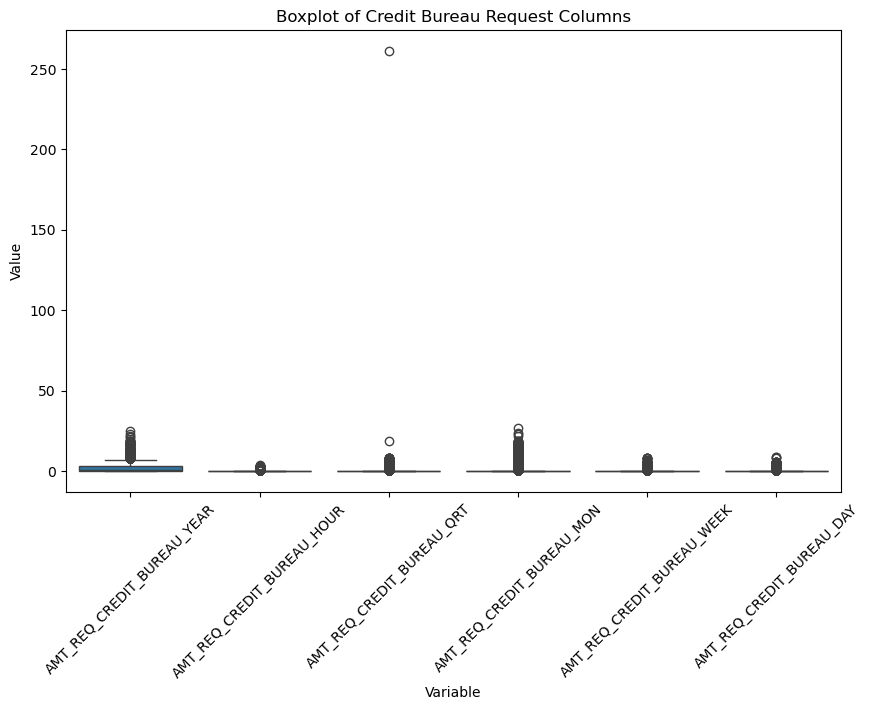

In [25]:
columns_of_interest = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY'
]
df_melted = df_application_current[columns_of_interest].melt(var_name='Variable', value_name='Value')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.xticks(rotation=45)
plt.title('Boxplot of Credit Bureau Request Columns')
plt.show()

In [26]:
for column in columns_of_interest:
    median_value = df_application_current[column].median()
    df_application_current[column].fillna(median_value, inplace=True)

We can see all the columns_of_interest has outliers. Since the fields could be good for computation in future so I can replace the NA values with the median, and then again check the outliers.


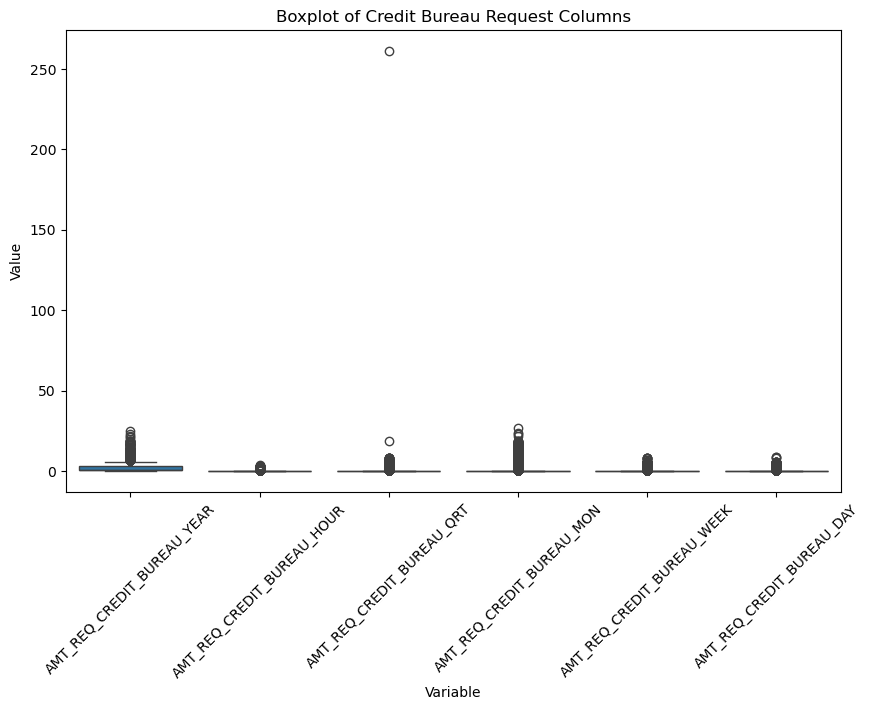

In [27]:
columns_of_interest = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY'
]
df_melted = df_application_current[columns_of_interest].melt(var_name='Variable', value_name='Value')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.xticks(rotation=45)
plt.title('Boxplot of Credit Bureau Request Columns')
plt.show()

Still the outliers remains after removing the NA values with median, so either we can drop the outliers values or we can set the values of outliers with median values.

In [28]:
# Fill NaN values with the median for the columns of interest
for column in columns_of_interest:
    median_value = df_application_current[column].median()

    # Calculate IQR
    Q1 = df_application_current[column].quantile(0.25)
    Q3 = df_application_current[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    df_application_current.loc[(df_application_current[column] < lower_bound) | (df_application_current[column] > upper_bound), column] = median_value

Now lets come back and check what all empty values are left

In [29]:
# Percentage of missing values in each column left
(df_application_current.isnull().sum()/df_application_current.shape[0]*100).sort_values(ascending=False).head(5)


EXT_SOURCE_2       0.214626
AMT_GOODS_PRICE    0.090403
AMT_ANNUITY        0.003902
CNT_FAM_MEMBERS    0.000650
SK_ID_CURR         0.000000
dtype: float64

Only 4 columns are having NA values and that too with less than 1 % so I am dropping the rows where these values are NA

In [30]:
columns_to_check = [
    'EXT_SOURCE_2',
    'AMT_GOODS_PRICE',
    'AMT_ANNUITY',
    'CNT_FAM_MEMBERS'
]

df_application_current.dropna(subset=columns_to_check, inplace=True)

#### The data is clean now and we can move to further steps of EDA

In [31]:
# Percentage of rows lost in the cleaning process
df_application_current.shape

(306562, 53)

In [32]:
# Percentage of rows lost during the cleaning process
(1-(df_application_current.shape[0]/307511))*100

0.3086068465843472

#### Only 0.3% of rows are lost in our data analysis

## Univariate and Bivariate Analysis 


[Text(0.5, 0, 'Gender')]

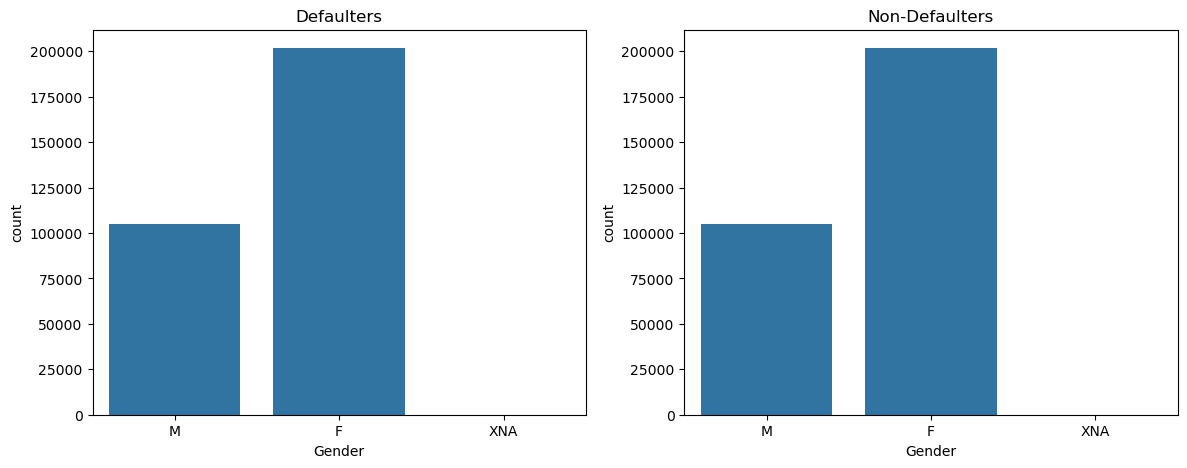

In [33]:
# Plotting the distribution of the target variable
# Gender wise defaulters


plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_application_current)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_application_current)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

##### Analysis
1 Defaulters:
- Among the defaulters, we observe a slightly higher number of females compared to males.
- This suggests that female borrowers are more likely to default on their obligations.

2 Non-Defaulters:
- Similarly, among the non-defaulters, the trend persists: there are more females than males.
- Non-defaulting female borrowers outnumber their male counterparts.

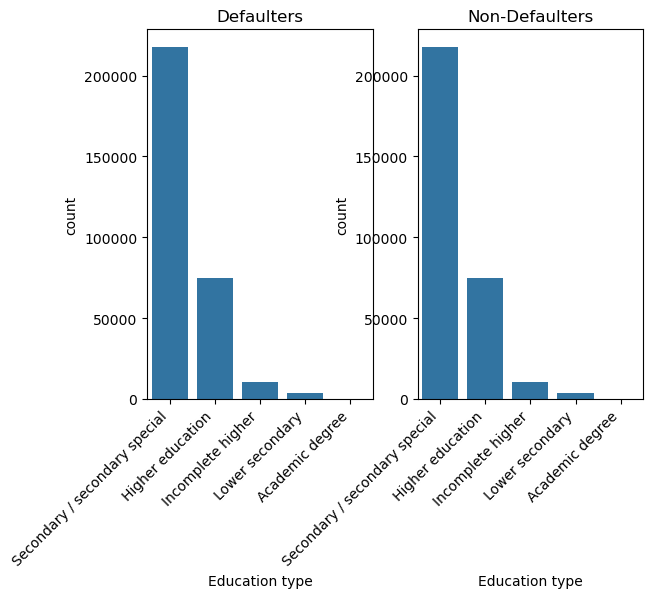

In [34]:
# Education wise defaulters

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_application_current)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_application_current)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

1 Defaulters:
- Among the borrowers who defaulted, a significant proportion had a secondary or secondary special education level.
- This suggests that individuals with lower educational attainment may be more prone to defaulting on their obligations.

2 Non-Defaulters:
- Similarly, among the non-defaulting borrowers, the trend persists: a higher number of individuals with secondary or secondary special education levels.
- Non-defaulting borrowers in this category outnumber those with higher educational qualifications.

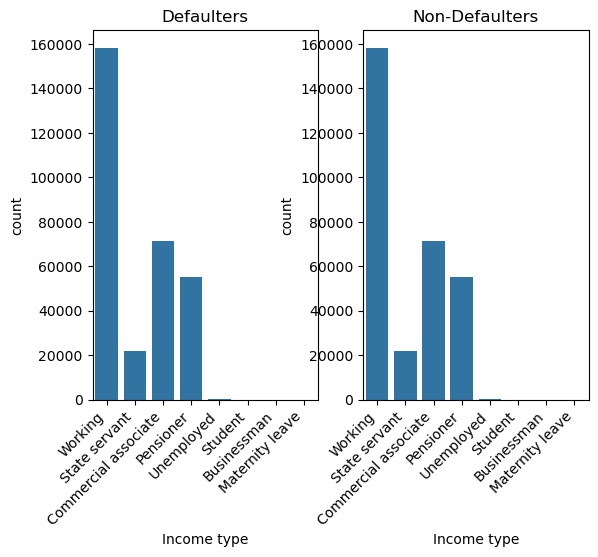

In [35]:
# Defaulters on the basis of Income type

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_application_current)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_application_current)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

1 Defaulters:
- Among the borrowers who defaulted, a significant proportion were working professionals.
- Their higher representation suggests that individuals in the workforce are more likely to default on their obligations.

2 Non-Defaulters:
- Similarly, among the non-defaulting borrowers, the trend persists: a larger number of working professionals.
- Non-defaulting borrowers in this category outnumber those from other professions.

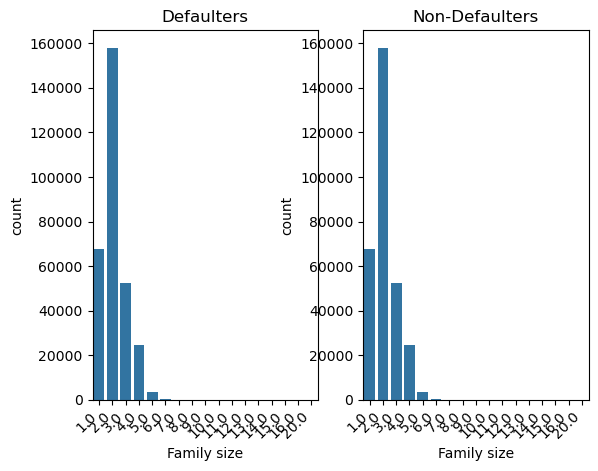

In [36]:
# Defaulters on the basis of Family size

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CNT_FAM_MEMBERS',data=df_application_current)
plt.title('Defaulters')
ax.set(xlabel='Family size')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CNT_FAM_MEMBERS',data=df_application_current)
plt.title('Non-Defaulters')
ax.set(xlabel='Family size')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

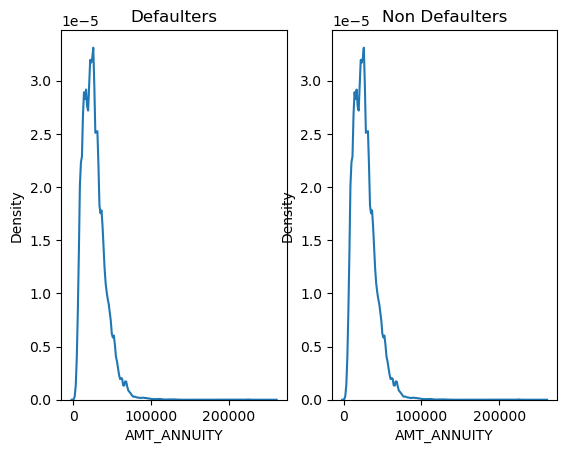

In [38]:
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_application_current['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_application_current['AMT_ANNUITY'],hist=False)